<a href="https://colab.research.google.com/github/Rakeshyrc/PDF-to-Answers-Chatbot/blob/main/PDF_to_Answer_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pypdf

In [ ]:
!pip install tiktoken

In [ ]:
# Install necessary libraries
!pip install langchain==0.0.150 pypdf2 pandas matplotlib textract transformers openai faiss-cpu

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [3]:
# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "API-KEY"

In [7]:
# Load your PDF content
pdf_path = "/content/powerbi_interview.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load_and_split()

In [9]:
# Extract text content from each page and join them together
text = " ".join([page.page_content for page in pages])

# Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

In [10]:
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

In [11]:
# Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=24,
    length_function=count_tokens,
)

chunks = text_splitter.create_documents([text])

In [12]:
# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

In [13]:

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

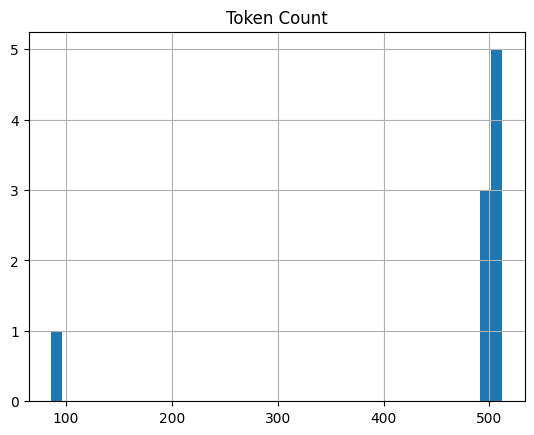

In [14]:
# Create a histogram of the token count distribution
df.hist(bins=40)
plt.show()

In [15]:
# Get embedding model
embeddings = OpenAIEmbeddings()

In [16]:
# Create vector database
db = FAISS.from_documents(chunks, embeddings)

In [17]:
# Load a question-answering chain
chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")

In [18]:
# Create conversation chain using the vector database as a retriever
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1), db.as_retriever())

In [19]:
# Define a function for chat interaction
def chat_with_bot():
    chat_history = []
    print("Welcome to the Transformers chatbot! Type 'exit' to stop.")

    while True:
        query = input("You: ")

        if query.lower() == 'exit':
            print("Thank you for using the chatbot!")
            break

        result = qa({"question": query, "chat_history": chat_history})
        chat_history.append((query, result['answer']))
        print(f"Chatbot: {result['answer']}")

In [21]:
# Start the chat
chat_with_bot()

Welcome to the Transformers chatbot! Type 'exit' to stop.
You: what is this PDF about ?
Chatbot:  This PDF is about Power BI Interview Questions. It covers topics such as what Power BI is, its components, the various Power BI versions, DAX, views, filters, and visualizations. It also includes questions for both freshers and experienced professionals.
You: what is KPI and how they are used in bussiness ?
Chatbot:  KPI stands for Key Performance Indicator. It is a metric used to measure the performance of a business or organization. It is used to measure progress towards a goal and can be used to compare performance against competitors. KPI's are used to measure the success of a business or organization in achieving its goals.
You: how is jawan movie ?


Chatbot:  I don't know.
You: exit
Thank you for using the chatbot!
